# Linear Regression

Iremos utilizar o modelo de regreção linear para treinar nossos dados, logo, a tendência deles no final será um amontoado em uma reta

In [1]:
#Importes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
#Criar vetor
tip_v = np.random.randint(
    low = 0,
    high = 10,
    size = 1000#Cria o vetor
)


bill_v = np.random.randint(
    low = 40,
    high = 80,
    size = 1000
)

debt_v = np.random.randint(
    low = 10,
    high = 30,
    size = 1000
)

In [4]:
#Criar Dict
data1 = {
    'tip':tip_v,
    'bill':bill_v,
    'debt':debt_v
}

#Criar tabela
df = pd.DataFrame(
    data = data1
)
df.head(2)

,tip,bill,debt
0,0,55,25
1,5,43,28


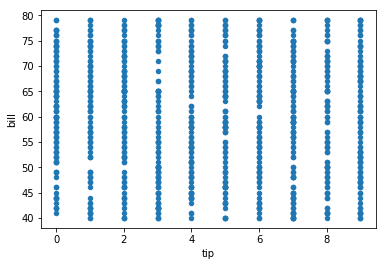

In [5]:
df.plot(
    x = 'tip',
    y = 'bill',
    kind = 'scatter'
)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
tip     1000 non-null int64
bill    1000 non-null int64
debt    1000 non-null int64
dtypes: int64(3)
memory usage: 23.5 KB


In [7]:
df.columns

Index(['tip', 'bill', 'debt'], dtype='object')

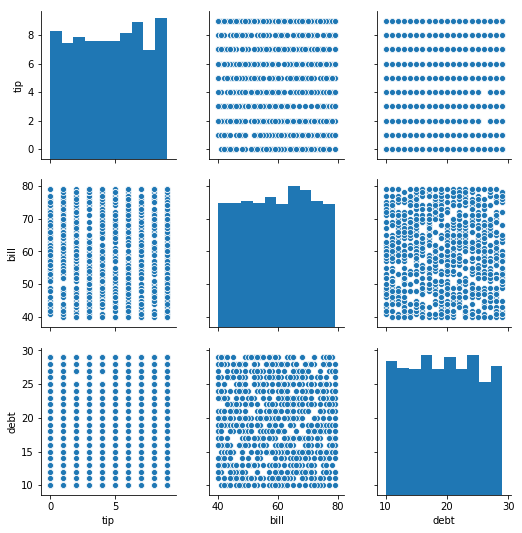

In [8]:
sns.pairplot(df)

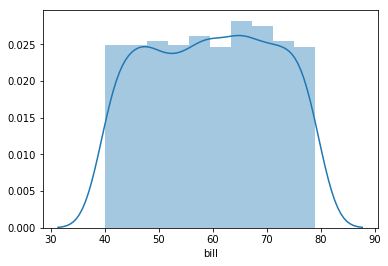

In [9]:
sns.distplot(df['bill'],bins=10)

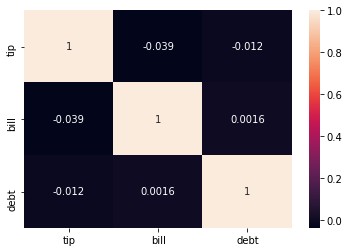

In [10]:
sns.heatmap(df.corr(),annot = True)

Pandas <font color = 'red'>dataframe.corr()</font> is used to find the pairwise correlation of all columns in the dataframe. Any na values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored.

In [11]:
df.corr()

,tip,bill,debt
tip,1.000000,-0.038889,-0.012143
bill,-0.038889,1.000000,0.001600
debt,-0.012143,0.001600,1.000000


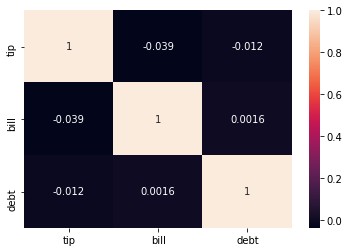

In [12]:
sns.heatmap(
    df.corr(),
    annot = True, #Coloca os números no centro
)

In [13]:
# Iniciar o treinamento

In [14]:
df.columns

Index(['tip', 'bill', 'debt'], dtype='object')

In [15]:
X = df[['tip','debt']]

In [16]:
y = df['bill']

In [17]:
#from sklearn.cross_validation import train_test_split

#Mudou para...

from sklearn.model_selection import train_test_split

In [18]:
 X_train,X_test,y_train,y_test = train_test_split(
     X,# As características dos dados
     y,# Os dados que queremos prever
     test_size=0.7,
     random_state=100,
 )

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lm = LinearRegression()

In [21]:
lm.fit(
    X_train,
    y_train
)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
print(lm.intercept_)

60.46380382590896


In [23]:
lm.coef_

array([-0.49971029,  0.08335728])

In [24]:
X_train.columns

Index(['tip', 'debt'], dtype='object')

In [25]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns = ['Coeff'])

In [26]:
cdf

,Coeff
tip,-0.499710
debt,0.083357


In [27]:
from sklearn.datasets import load_boston

In [28]:
#Pegar dados de Boston
boston = load_boston()

In [29]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [30]:
#print(boston['DESCR'])

# Predictions 

In [31]:
predictions = lm.predict(X_test)

In [32]:
predictions

array([58.79925862, 58.88304931, 62.88116504, 61.46409122, 58.46626289,
       59.29940232, 60.71560931, 59.96582717, 58.88218249, 59.88203648,
       60.29795608, 62.21430677, 61.04817163, 62.38102134, 62.29766406,
       61.79752036, 61.29824348, 61.54788192, 59.63196463, 61.38160076,
       61.04817163, 56.88334133, 62.38145475, 61.1310955 , 59.88246989,
       61.79795377, 60.2992563 , 60.29838949, 62.38145475, 62.1313829 ,
       59.63196463, 62.54773591, 57.38348503, 59.21561162, 59.04933047,
       57.9665526 , 59.71532191, 58.21705786, 57.88319532, 62.46437862,
       58.71590133, 59.88203648, 56.88334133, 60.7151759 , 60.13210833,
       57.0500559 , 57.30012775, 57.96611919, 61.96423492, 59.88160307,
       60.13167492, 60.13254174, 61.38073394, 58.71590133, 60.46510405,
       56.96669861, 62.38102134, 59.21604503, 61.38116735, 61.71416307,
       61.71459648, 60.88232388, 57.88319532, 62.21430677, 57.88276191,
       61.04860504, 59.88160307, 60.04875105, 57.71691416, 57.38

In [33]:
y_test

249    79
353    48
537    51
424    61
564    57
124    56
492    58
553    76
982    71
935    79
633    58
771    75
146    44
672    76
727    49
395    64
330    65
923    73
315    54
629    61
956    46
216    79
930    65
44     76
116    67
639    61
879    40
48     74
562    41
781    58
       ..
522    75
368    75
843    71
936    56
589    76
8      42
504    71
571    70
234    57
663    74
344    54
998    68
777    75
673    73
476    63
586    64
715    60
132    75
659    53
26     71
611    40
291    42
292    49
39     50
204    71
793    50
794    54
595    46
343    54
640    46
Name: bill, Length: 700, dtype: int64

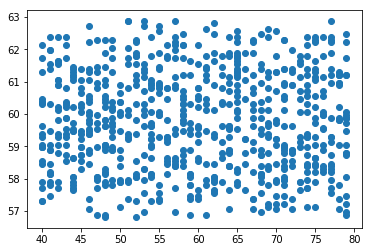

In [34]:
plt.scatter(y_test,predictions)

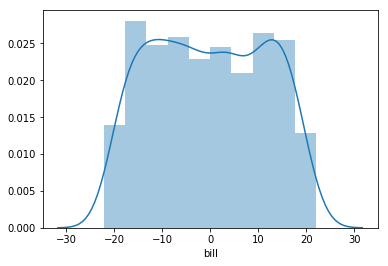

In [35]:
sns.distplot(y_test - predictions)

# Regressao Linear e Regressão Logística

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
%matplotlib inline

In [38]:
#Regressão Linear

dados = {
    'idade': [20,25,30,35,40,45,50,55,60,65],
    'peso': [90,85,80,75,70,65,60,55,50,45],
    'QI': [100,150,200,250,300,350,400,450,500,550]
}

df1 = pd.DataFrame(dados)
df1.head(3)

,idade,peso,QI
0,20,90,100
1,25,85,150
2,30,80,200


In [39]:
df1.corr()#correlação

,idade,peso,QI
idade,1.0,-1.0,1.0
peso,-1.0,1.0,-1.0
QI,1.0,-1.0,1.0


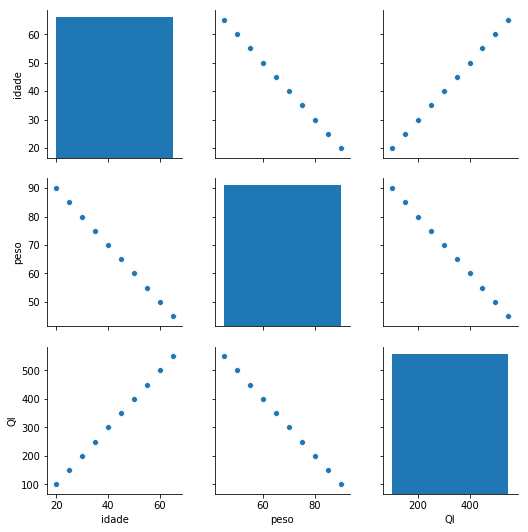

In [40]:
sns.pairplot(df1)

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X = df1.drop(['QI'], axis=1)#Drop = tirar coluna
#ou pode fazer
#X = df1[['idade','peso']]

y = df1['QI']

In [43]:
X.head(2)

,idade,peso
0,20,90
1,25,85


In [44]:
y.head(2)

0    100
1    150
Name: QI, dtype: int64

In [45]:
X_train,X_test,y_train,y_test = train_test_split(
    X,
    y,
    test_size=0.3,# 30% dos dados ficarão fora do treino
    #random_state=42,
)

In [46]:
#Visualizar os dados
X_train
# Ele pegou aleatoriamente 7 dados da coluna...
#pois lembra que ele retira 30% dos dados pra 
#fazer o X_test

,idade,peso
5,45,65
6,50,60
8,60,50
2,30,80
1,25,85
0,20,90
9,65,45


In [47]:
X_test
#Ele pegou 30% dos dados pra estudar separado

,idade,peso
3,35,75
7,55,55
4,40,70


In [48]:
#Vou treinar agora os dados
from sklearn.linear_model import LinearRegression

In [49]:
lm = LinearRegression()

In [50]:
lm.fit(X_train,y_train)
pred = lm.predict(X_test)#Predição
dis = pd.DataFrame(y_test)#Dispersão
dis['Pred'] = pred

In [51]:
pred

array([250., 450., 300.])

In [52]:
dis

,QI,Pred
3,250,250.0
7,450,450.0
4,300,300.0


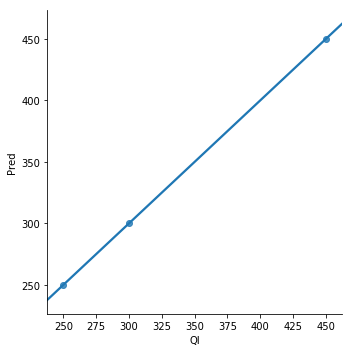

In [53]:
sns.lmplot(x='QI',y='Pred',data = dis)

In [54]:
lm.score(X_train,y_train) # Bateu 100%... o treinamento funcinou


1.0

In [55]:
#lm.score(X_train,y_test) # Dá erro... devido ao tamanho da variável teste (ter 30% do tamanho) 
#e trainamento ter (70% do valo)

In [56]:
lm.score(X_test,y_test)

1.0

SVR complexity and bandwidth selected and model fitted in 0.742 s
KRR complexity and bandwidth selected and model fitted in 0.483 s
Support vector ratio: 0.320
SVR prediction for 100000 inputs in 0.155 s
KRR prediction for 100000 inputs in 0.325 s


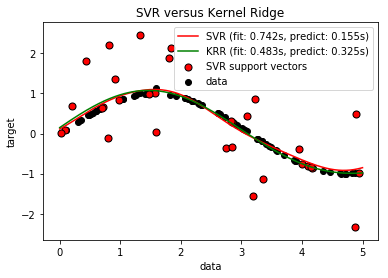

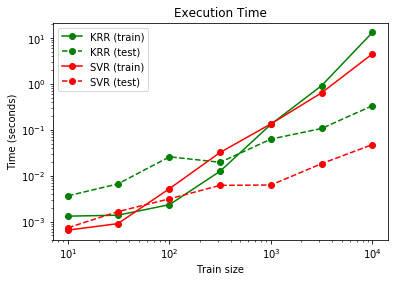

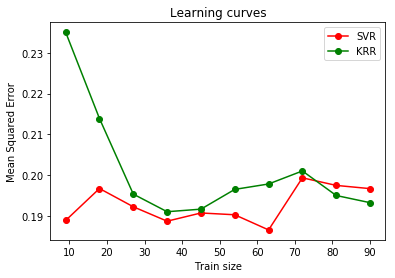

In [57]:

import time

import numpy as np

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge
import matplotlib.pyplot as plt

rng = np.random.RandomState(0)

# #############################################################################
# Generate sample data
X = 5 * rng.rand(10000, 1)
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 3 * (0.5 - rng.rand(X.shape[0] // 5))

X_plot = np.linspace(0, 5, 100000)[:, None]

# #############################################################################
# Fit regression model
train_size = 100
svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1),
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)})

kr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1),
                  param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3],
                              "gamma": np.logspace(-2, 2, 5)})

t0 = time.time()
svr.fit(X[:train_size], y[:train_size])
svr_fit = time.time() - t0
print("SVR complexity and bandwidth selected and model fitted in %.3f s"
      % svr_fit)

t0 = time.time()
kr.fit(X[:train_size], y[:train_size])
kr_fit = time.time() - t0
print("KRR complexity and bandwidth selected and model fitted in %.3f s"
      % kr_fit)

sv_ratio = svr.best_estimator_.support_.shape[0] / train_size
print("Support vector ratio: %.3f" % sv_ratio)

t0 = time.time()
y_svr = svr.predict(X_plot)
svr_predict = time.time() - t0
print("SVR prediction for %d inputs in %.3f s"
      % (X_plot.shape[0], svr_predict))

t0 = time.time()
y_kr = kr.predict(X_plot)
kr_predict = time.time() - t0
print("KRR prediction for %d inputs in %.3f s"
      % (X_plot.shape[0], kr_predict))


# #############################################################################
# Look at the results
sv_ind = svr.best_estimator_.support_
plt.scatter(X[sv_ind], y[sv_ind], c='r', s=50, label='SVR support vectors',
            zorder=2, edgecolors=(0, 0, 0))
plt.scatter(X[:100], y[:100], c='k', label='data', zorder=1,
            edgecolors=(0, 0, 0))
plt.plot(X_plot, y_svr, c='r',
         label='SVR (fit: %.3fs, predict: %.3fs)' % (svr_fit, svr_predict))
plt.plot(X_plot, y_kr, c='g',
         label='KRR (fit: %.3fs, predict: %.3fs)' % (kr_fit, kr_predict))
plt.xlabel('data')
plt.ylabel('target')
plt.title('SVR versus Kernel Ridge')
plt.legend()

# Visualize training and prediction time
plt.figure()

# Generate sample data
X = 5 * rng.rand(10000, 1)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(X.shape[0] // 5))
sizes = np.logspace(1, 4, 7).astype(np.int)
for name, estimator in {"KRR": KernelRidge(kernel='rbf', alpha=0.1,
                                           gamma=10),
                        "SVR": SVR(kernel='rbf', C=1e1, gamma=10)}.items():
    train_time = []
    test_time = []
    for train_test_size in sizes:
        t0 = time.time()
        estimator.fit(X[:train_test_size], y[:train_test_size])
        train_time.append(time.time() - t0)

        t0 = time.time()
        estimator.predict(X_plot[:1000])
        test_time.append(time.time() - t0)

    plt.plot(sizes, train_time, 'o-', color="r" if name == "SVR" else "g",
             label="%s (train)" % name)
    plt.plot(sizes, test_time, 'o--', color="r" if name == "SVR" else "g",
             label="%s (test)" % name)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Train size")
plt.ylabel("Time (seconds)")
plt.title('Execution Time')
plt.legend(loc="best")

# Visualize learning curves
plt.figure()

svr = SVR(kernel='rbf', C=1e1, gamma=0.1)
kr = KernelRidge(kernel='rbf', alpha=0.1, gamma=0.1)
train_sizes, train_scores_svr, test_scores_svr = \
    learning_curve(svr, X[:100], y[:100], train_sizes=np.linspace(0.1, 1, 10),
                   scoring="neg_mean_squared_error", cv=10)
train_sizes_abs, train_scores_kr, test_scores_kr = \
    learning_curve(kr, X[:100], y[:100], train_sizes=np.linspace(0.1, 1, 10),
                   scoring="neg_mean_squared_error", cv=10)

plt.plot(train_sizes, -test_scores_svr.mean(1), 'o-', color="r",
         label="SVR")
plt.plot(train_sizes, -test_scores_kr.mean(1), 'o-', color="g",
         label="KRR")
plt.xlabel("Train size")
plt.ylabel("Mean Squared Error")
plt.title('Learning curves')
plt.legend(loc="best")

plt.show()